#A Review of Regularization and an Introduction to Support Vector Machines (SVMs)

1. [Regularization: Motivations and Methods](#why-regularization)
1. [A review of Lp spaces and p-norms](#lp-spaces-regularization)
1. [L1 and L2 regularization](#L1 and L2 regularization)
1. [L1 Regularization: Lasso regression](#lasso-regression)
1. [L2 Regularization: Ridge regression](#ridge-regression)
1. [L3/2 Regularization: Elastic Net regression](#elastic-net)
1. [A Summary of the Different Norms](#norms-summary)
1. [A few Short Demonstrations](#demonstrations)
1. [Appendix](#appendix)
1. [Additional Reading](#additional-reading)

##By the end of this lesson you should:
1. Know what regularization is and does
1. Know what shrinkage is and why it's important
1. What a $L^{p}$ space is
1. What Lasso, Ridge and Elastic Net are and why use them
1. Have a keen understanding of the demonstration code used in this lecture
1. Understand what a Support Vector machine is and why we use it



##Regularization: Motivations and Methods

You may recall how a large population of $\beta$ coefficients rapidly increases the chances of overfitting a regression model. This leads to tradeoffs in bias and variance, with which you are already quite familiar.

![BV](images/bias_variance_graph.png)

The solution of choice is to apply *regularization* to the regression. Regularization is commonly described as adding a *penalty function* or additional factor to the coefficient matrix of the regression.

This penalty function enables us to regress while forcing the values of the $\beta$ coefficients to be as *small as possible when taken as a whole*. This process is called "shrinkage" of the coefficients. 

**It turns out that the smaller the coefficients of regression are, the more robust the regression itself is. This is because smaller coefficients reduce the strength of effect of any one variable on the regression.**

The definition of constitutes the "size" of the $\beta$ coefficients *taken as a whole* is what determines the form of the penalty function. In practice, this produces remarkable differences in performance between different types of regularized regressions. We shall first explore why this is true.

##A review of Lp spaces and p-norms


The $L^{p}$, or Lebesgue space, consists of all of functions of the form:

$\|f\|_{p} = (|x_{1}|^{p}+|x_{2}|^{p}+|x_{n}|^{p}+)^{1/p}$

This mathematical object is known as a *p-norm*.
You are already at least cursorily familiar with p-norms.


### $p$-norms

For any $n$-dimensional real or complex vector. i.e. $x \in \mathbb{R}^n \text{ or } \mathbb{C}^n$, and for any real number $p \ge 1$, the __$p$-norm__ or __L$^p$ norm__ is defined as

$$ \|x\|_p = \left(|x_1|^p+|x_2|^p+\dotsb+|x_n|^p\right)^{\frac{1}{p}} $$

$$ \|x\|_p = \begin{pmatrix}\sum_{i=1}^n{|x_i|^p} \end{pmatrix}^{\frac{1}{p}}  \quad \rightarrow Eq. 1 $$ 


### Norm properties

All $p$-norms satisfy the properties of a norm:

For a set $V$ defined over a field $F$ a _norm_, denoted as $\|.\|$, is a function from $V$ to $R$ that satisfies the following conditions for any ${x, y} \in V$ and $\text{a} \in R$:

1. Non-negativity
    $$ \|x\| > 0 \ \forall x \neq 0 $$
    $$ \\ $$
2. Mapping of additive identity
    $$ \|0\| = 0 $$
    $$ \\ $$
3. Absolute scalability
    $$ \|ax\| = |a|\|x\| $$
    $$ \\ $$
4. Triangle inequality
    $$ \|x + y \| \leq \|x\| + \|y\| $$
    $$ \\ $$


If the set $V$ represents a vector space, then the vector space taken together with a norm, $(V,\|.\|)$, is called a __normed vector space__. Given a normed vector space $(V,\|.\|)$ and vectors ${x, y} \in V$, and we define a metric: 

$$ d(x,y) = \|x-y\| $$

For vectors the norm specifies the _length_ of the vector; the calculation of length given by the norm varies based on the type of norm chosen. 

The natural expression of the norm in euclidean space is well known as the Euclidean norm, which is the $L^{2}$ norm:

$\|f\|_{2} = (|x_{1}|^{2}+|x_{2}|^{2}+|x_{n}|^{2}+)^{1/2}$


 The __Unit circle__, or a _norm ball_, of a norm is a unique characteristic of a norm that helps us visualize the norm and understand the shape, or _topology_, of the underlying normed space. The unit circle of an L$^p$-norm in $\mathbb{R}^n$ is given by: 

$$\{ x \in \mathbb{R}^n \ |\  \|x\|_p = 1 \}$$

We can plot the unit circle of the Euclidean norm (in 2-space) as follows:

In [17]:
import pylab
from numpy import array, linalg, random, sqrt, inf
import matplotlib.pyplot as plt
%matplotlib inline

def plotUnitCircle(p, n):
    
    #given a number of requested points
    for i in range(n):
        
        #select a random point x, with result centered on 0,0
        x = array([random.rand()*2-1,random.rand()*2-1])
        
        #this restricts the sample to fit the norm
        if linalg.norm(x,p) < 1:
            plt.plot(x[0],x[1],'bo')
    plt.show()

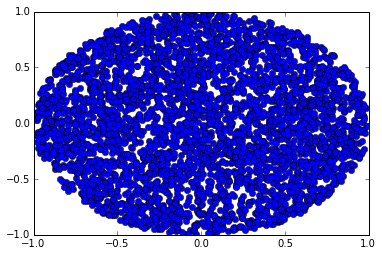

In [20]:
plotUnitCircle(2,5000)

## L1 and L2 regularization

Recall that the process of regression is one in which we project *regressors* onto a set of data. The regressors are a description of a putative set of relationships amongst the features of the data.

One way of doing this is by including the current "size" of the $\beta$ coefficients, by considering them as a vector of length $n$,

$\textbf{$\beta$} = \begin{bmatrix} \beta_{1} & \beta_{2} & \dots & \beta_{n} \end{bmatrix} $

The length of this vector can be included in our calculation of the regression, and thanks to p-norms, there are different ways to express the vector's length in different $L^{p}$ spaces.

In we are looking to find a way to *regularize* the relative emphasis of each feature so as to reduce overfitting. One way of doing this is to constrain the p-norm of the $\beta$ coefficients to a maximum possible size. This leads us to **regularized regression**.

Thus we have:

##**Regularized Regression**

###**Hypothesis:**

The variables can be most accurately described as a linear regression, given that we constrain the emphasis of some of the features so that their solutions are made less prone to overfitting.

$$Y = \textbf{$\beta$}^{T}X+\beta_0$$


###**Cost Function:**

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda\|f(\textbf{$\beta$})\|)$$


###Optimization:

Most commonly gradient descent, coordinate descent or least-angle regression (LARS), although other optimizations are often used.

###Reasoning:

Shrinking the size of the $\beta$ coefficients makes the regression more robust, and in general,
####**Smaller overall coefficients produce more robust regressions (less bias and variance)**. 
Tradeoffs in the accuracy and utility of regularization methods occur where the features are collinear (a relatively common case).

##L1 Regularization: Lasso regression

LASSO: Least Absolute Shrinkage and Selection Operator

###Motivation:

1. Large, sparse datasets
1. Numerous features
1. Only some features likely to be important - uncertain of which ones
1. Little collinearity

###Mode of Action:
1. Beta coefficients with values close to zero and with significant collinearity tend to get dropped ($\beta = 0$).
1. Tends to select only one variable among a set of regressors that have high pairwise correlations with each other.
1. Uses a Laplacian (double exponential) prior for the $\beta$ values.


###Cost Function:

We add an $L^{1}$ p-norm to the least squares equation and look for the values of $\beta$ that satisfy it. This is the same thing as the taxicab or Manhattan distance of the $\beta$ vector. We minimize:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda\|\textbf{$\beta$}\|_1)$$ 

(vector form)

$$F(\textbf{$\beta$}) = \sum\limits_{i=1}^n(y_i-\beta_0-\beta_iX)+\lambda \sum\limits_{i=1}^n|\beta_i|$$ 

(functional form)

The size of $\lambda$ determines the "size" of the regularization factor relative to the least squares estimate.




###p-Norm: $L^{1}$

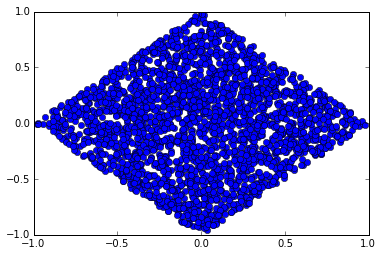

In [24]:
plotUnitCircle(1,5000)

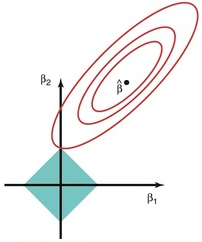

In [82]:
Image(filename='/Users/datascientist/Desktop/DSCI6003/week3/3.1/images/Lasso_Regression.png', width=400, height=800)


####Blue Square: Region of $|\beta|$ constrained by $\lambda$
####Red Level curves: Optimization funnel plotted as a function of $\beta_1$ vs. $\beta_2$
####$\hat{\textbf{$\beta$}}$:  theoretical absolute minimum of $(Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)$: OLS solution


####Solutions to the cost function are found at the intersection of the red level curves and blue region.

###Solutions to the cost function are found at the intersection of the red level curves and blue region. We try to minimize the size of both the red circles and blue square simultantously.


Note that Lasso has solutions of the norm on the corners, and so will find cases on the corners quite easily (in high dimensions, this is even more likely for reasons already discussed). When this happens, these $\beta$ coefficients are set to zero. Lasso solutions are not unique. In the case where there are many more regressors than regressands (more features than responses), multiple solutions are common. 

## L2 Regularization: Ridge regression


###Motivation:

1. General Regression Case.
1. Some features are known to be more important than others.
1. Collinearity is likely to be present.

###Mode of Action:
1. Specifically designed to defeat collinearity.
1. Attempts to shrink the size of the coefficients - "Shrinkage".
1. Uses a Gaussian prior for the $\beta$ values.


###Cost Function:

We add an $L^{2}$ p-norm to the least squares equation and look for the values of $\beta$ that satisfy it. This is the same thing as the Euclidean length of the $\beta$ vector. We minimize:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda\|\textbf{$\beta$}\|_2)$$ 

(vector form)

$$F(\textbf{$\beta$}) = \sum\limits_{i=1}^n(y_i-\beta_0-\beta_iX)+\lambda \sum\limits_{i=1}^n\beta_i^{2}$$ 

(functional form)

The size of $\lambda$ determines the "size" of the regularization factor relative to the least squares estimate.

###p-Norm: $L^{2}$

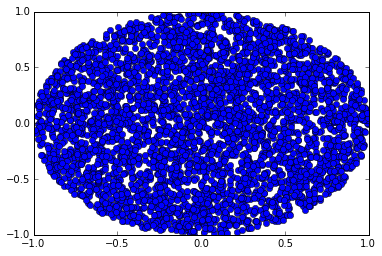

In [27]:
plotUnitCircle(2,5000)

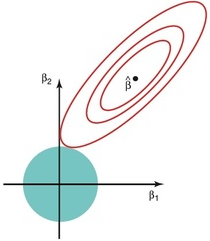

In [83]:
Image(filename='/Users/datascientist/Desktop/DSCI6003/week3/3.1/images/Ridge_Regression.png',  width=400, height=800)

####Blue Square: Region of $|\beta|$ constrained by $\lambda$
####Red Level curves: Cost gradient plotted as a function of $\beta_1$ vs. $\beta_2$
####$\hat{\textbf{$\beta$}}$:  theoretical absolute minimum of $(Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)$: OLS solution
###Solutions to the cost function are found at the intersection of the red level curves and blue region. We try to minimize the size of both the red circles and blue circle simultantously.

Ridge can find solutions away from the axes, and so is less likely to find solutions for $\beta$ equal to zero. However, the shape of the norm encourages the minimization of the size of the $\beta$ coefficients. It should be obvious from the figure that the larger of the area of the circle, the more likely we will find solutions with small $\beta_2$. This principle is generalizable to many dimensions.

##L3/2 Regularization: Elastic Net regression 

###(often called enet)


###Motivation:

1. Cases where both Lasso is useful but may have collinearity between features
1. Enables the benefit of coefficient shrinkage along with the ability to select features

###Mode of Action:
1. Specifically designed to enable feature selection without dropping groups of correlated features
1. Attempts to shrink the size of the coefficients - "Shrinkage"


###Cost Function:

We add both a $L^{1}$ and $L^{2}$ p-norm to the least squares equation and look for the values of $\beta$ that satisfy it. We minimize:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda_2\|\textbf{$\beta$}\|_2+\lambda_1\|\textbf{$\beta$}\|_1)$$ 

(vector form)

$$F(\textbf{$\beta$}) = \sum\limits_{i=1}^n(\beta_iX-y_i-b_0)+\lambda_2 \sum\limits_{i=1}^n\beta_i^{2}+\lambda_1 \sum\limits_{i=1}^n|\beta_i|$$ 

(explicit form)

The size of $\lambda$ determines the "size" of the regularization factor relative to the least squares estimate. Commonly there is another hyperparameter that determines a ratio between $L^{1}$ and $L^{2}$.

In **most** implementations, the two $\lambda$ coefficients are combined into one coefficient, called $\alpha$, where $\alpha = \frac{\lambda_2}{\lambda_2+\lambda_1}$, giving a weighted formulation dependent on $\alpha$:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\alpha\|\textbf{$\beta$}\|_2+(1-\alpha)\|\textbf{$\beta$}\|_1)$$ 



###p-Norm: $L^{3/2}$

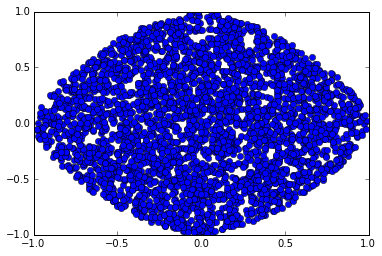

In [31]:
plotUnitCircle(1.5,5000)

##A Summary of the Different Norms

We can characterise the properties and behaviors of each of the above methods by observing the shapes of the penalty region. Returning to the above figure, we can imagine the intersection of the level curves of the optimization surface with the penalty region as being dependent on the penalty region's shape.

![normT](images/elasticnet.png)

####Dotted line: $L^{2}$; Dashed line: $L^{1}$; Solid line: $L^{3/2}$


1. The $L^{1}$ norm is very strict in terms of solutions, and tends to favor dropping small coefficients to 0 due to the corners. **SELECTION**
1. Solutions to the $L^{2}$ norm allow for solutions closer to the optimum RSS while allowing for good shrinkage. However, small multilinear coefficients will not be dropped, and in general, coefficient size is allowed to be larger. **SHRINKAGE**
1. Solutions to the $L^{3/2}$ norm are convex at the corners, enabling good shrinkage of small coefficients without forcing them to zero. It also allows for the regression to maintain groups of multilinear coefficients while still dropping those with no statistical effect. **SELECTION WITH SHRINKAGE**

##A Few Short Demonstrations

It's instructive to explore the ways in which the coefficients of regression (the $\beta$ coefficients) change with respect to the size of lambda. We will take an example regression over the same dataset (the built-in diabetes dataset in this case) and compute the coefficients of regression using the three different methods that we have learned today.

###Evolution of $\beta$ coefficients, dependent on $\lambda$

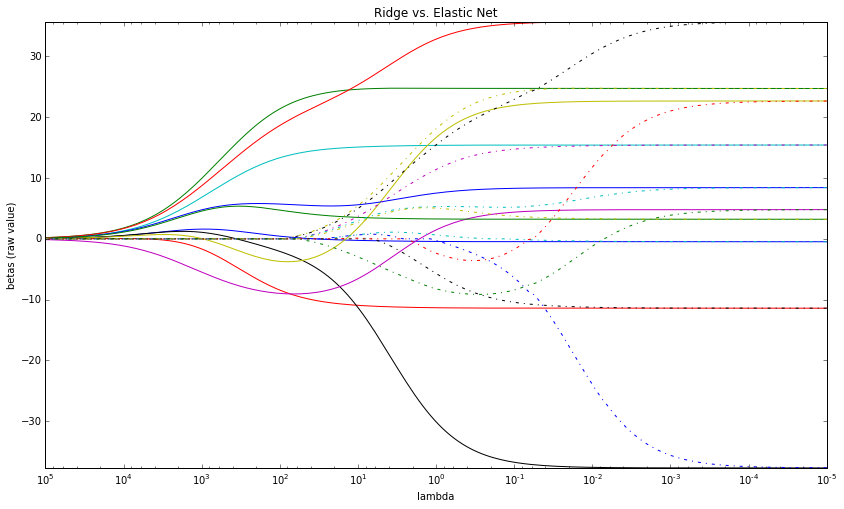

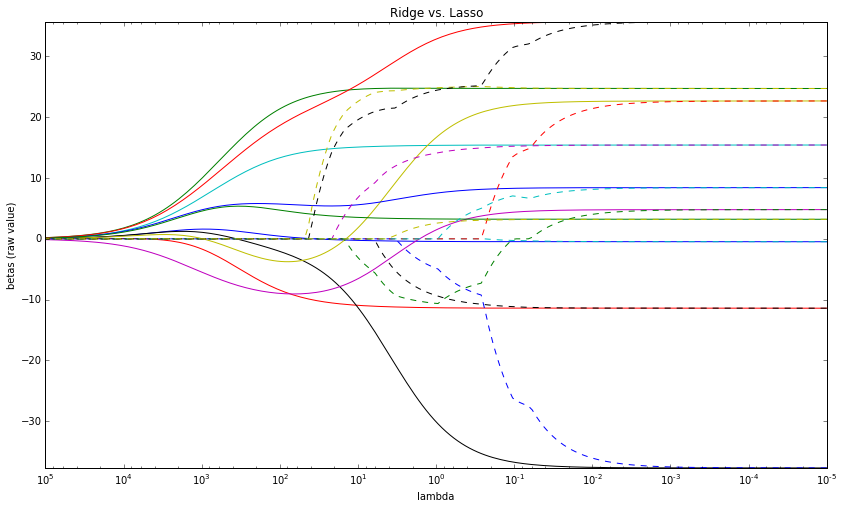

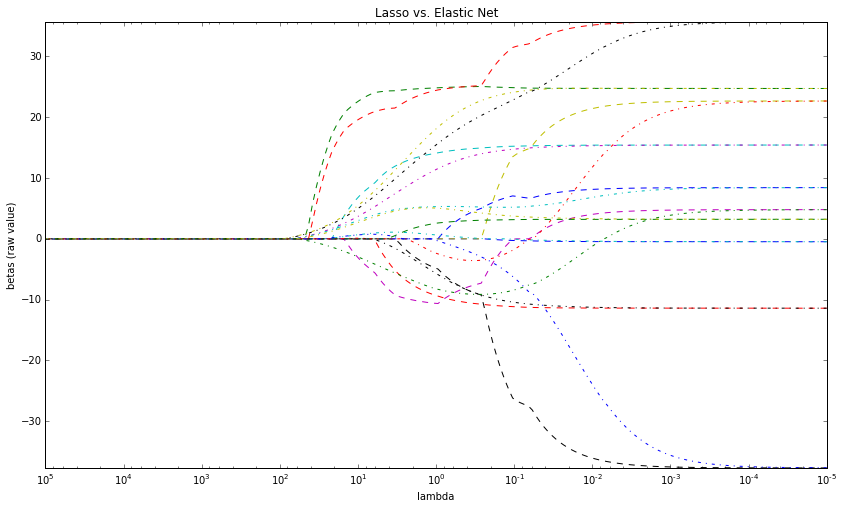

In [80]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets

# X is the 10x10 Hilbert matrix
#X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
#y = np.ones(10)

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)


###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)
clf2 = linear_model.Lasso(fit_intercept=False)
clf3 = linear_model.ElasticNet(fit_intercept=False)


coefs = []
coefs2 = []
coefs3 = []
for a in alphas:
    clf.set_params(alpha=a)
    clf2.set_params(alpha=a)
    clf3.set_params(alpha=a)
    clf.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    coefs.append(clf.coef_)
    coefs2.append(clf2.coef_)
    coefs3.append(clf3.coef_)
###############################################################################
# Display results

fig = plt.figure(figsize=(14,8))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.plot(alphas, coefs3, ls='-.')

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('betas (raw value)')
plt.title('Ridge vs. Elastic Net')
plt.axis('tight')
plt.show()

ax1 = plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax1.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax1.plot(alphas, coefs)
ax1.plot(alphas, coefs2, ls='--')

ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('betas (raw value)')
plt.title('Ridge vs. Lasso')
plt.axis('tight')
plt.show()

ax2 = plt.figure(figsize=(14,8))
ax2 = plt.gca()
ax2.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax2.plot(alphas, coefs2, ls='--')
ax2.plot(alphas, coefs3, ls='-.')

ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('betas (raw value)')
plt.title('Lasso vs. Elastic Net')
plt.axis('tight')
plt.show()


####We are plotting the magnitude of the $\beta$ coefficients with respect to lambda. 
####The nonzero ridge solutions appear with a much larger lambda. Note that all methods seem to converge to the same solution as lambda shrinks. Why?


##QUIZ: 
1. What is happening with the line shapes here? Can you describe them in terms of the unit ball?
1. What is happening with the line shapes furthest to the right and left of the chart?

###Feature selection with Regularized Regression: Advantages and Limitations

In [138]:
from sklearn.linear_model import MultiTaskLasso, Lasso, Ridge, ElasticNet, LinearRegression

In [148]:
rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_points = 100, 30, 40 #l, m, n
n_relevant_features = 1
coef = np.zeros((n_points, n_features)) # a nXm matrix, where n is the length in phase space

# Build a linear space of times ranging between 0 and 2pi
times = np.linspace(0, 2 * np.pi, n_points)

#This section constructs n_relevant features of length n_tasks. A small amount of noise is added to each one.
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

print coef
    

[[-0.4030004   0.          0.         ...,  0.          0.          0.        ]
 [-0.17278973  0.          0.         ...,  0.          0.          0.        ]
 [ 0.06741912  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.79420716  0.          0.         ...,  0.          0.          0.        ]
 [ 0.62612232  0.          0.         ...,  0.          0.          0.        ]
 [ 0.42180801  0.          0.         ...,  0.          0.          0.        ]]


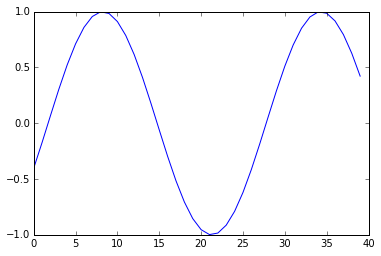

In [141]:
#Each feature is a somewhat imperfect sinusoid function

plt.plot(coef[:,0])

In [151]:
# Here we construct a dataset that projects our sinusoidal functions onto a random basis. 
# This is an approximation to a Reproducing Kernel Hilbert Space (see attachment). (RKHS)

#create the random basis. This is a l X m matrix. We need to create l samples in the basis space.
X = rng.randn(n_samples, n_features)

#Here we take the projection of the data into the basis space. We take X (l X m) * coef.T (m x n). 
# (another option is coef(n X m) * X.T (m X l) which wields a nXl matrix(points X samples))
#We also add a small noise factor to this as well. 

Y = np.dot(X, coef.T) + rng.randn(n_samples, n_points)

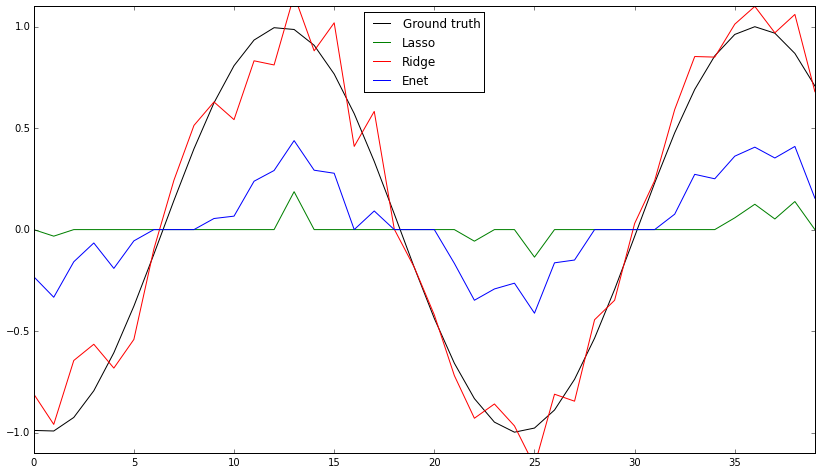

In [187]:
# We regress against the columns of the Y, which indicate a projection of the data into the random basis, using the 
# random basis itself as the data set. What will be returned is the coefficient required for each member of the random
# basis to correctly form the function. 
# This method is, in a sense, much like PCA except we are creating the principal components that we regress with.


coef_lasso_ = np.array([Lasso(alpha=1.).fit(X, y).coef_ for y in Y.T])
coef_ridge_ = np.array([Ridge(alpha=1.).fit(X, y).coef_ for y in Y.T])
coef_enet_ = np.array([ElasticNet(alpha=1.).fit(X, y).coef_ for y in Y.T])


###############################################################################


feature_to_plot = 1

fig = plt.figure(figsize=(14,8))
plt.plot(coef[:, feature_to_plot], 'k', label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], 'g', label='Lasso')
plt.plot(coef_ridge_[:, feature_to_plot],
         'r', label='Ridge')
plt.plot(coef_enet_[:, feature_to_plot],
         'b', label='Enet')

plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

####Here we plot the result of linear regressions against a cyclical function (sine waves). Changing settings for alpha and feature_to_plot will yield illustrative results. 

####Don't get too overwhelmed with RKHS regression. It's meant to make a nice picture to look at. 

##QUIZ: 
1. What can we do to improve the fit for enet and lasso?
1. Why is the lasso solution so inferior?

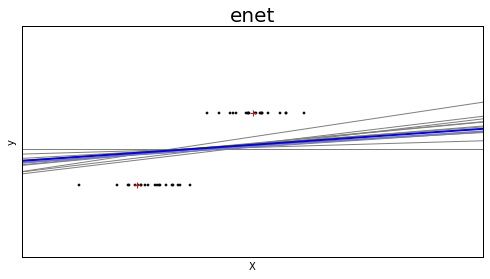

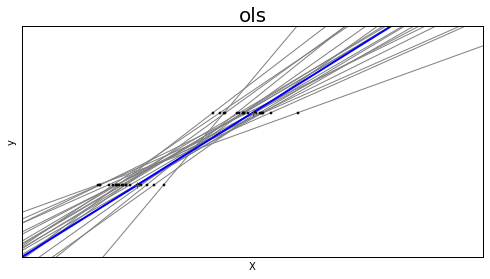

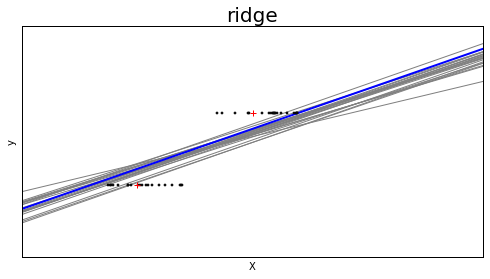

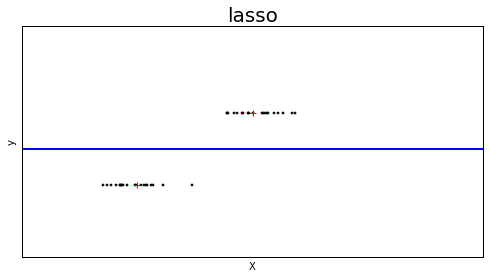

In [131]:
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   lasso=linear_model.Lasso(alpha=.1),ridge=linear_model.Ridge(alpha=.1),enet=linear_model.ElasticNet(alpha=0.1))

fignum = 1
for name, clf in classifiers.items():
    fig = plt.figure(fignum, figsize=(8, 4))
    plt.clf()
    #title = plt.title(name, size=20.)

    ax = plt.axes([.12, .12, .8, .8])
    plt.text(0.5, 1.02, name,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)
    for _ in range(20):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=3, c='.5', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='r', marker='+', zorder=10)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    fignum += 1

plt.show()

###Above plots:
####Grey Lines: Regression of lines against a selection of data + noise
####Blue Lines: Regression against training data without added noise

The great power of regularized regression is **resistance to noise**. Here we see where the choice of prior distribution for $\beta$ really affects the outcome of the regression. Note the close relationship of Ridge to OLS in terms of the spread of potential lines, although there's a distribution of OLS outcomes whereas most of the Ridge lines have virtually the same slope. Lasso depicts a strict boundary between the top and bottom distributions. 

##QUIZ:

1. Write the equation that we are modeling here. Why does Lasso only find a straight line?

##Introduction to Support Vector Machines

In the above figure, we obtain the result of a straight line that divides those two groups. In fact, we also obtain a similar result with enet. This is interesting, is it not, because it takes us from the realm of *regression* to the realm of *classification*. Suppose we wanted to produce some sort of regression whose sole intent is to, in fact, *classify* a number of groups. 

What would we need to produce such a regression? We would need to define a **plane** (A 2-D plane is a line) that cleanly divides the two groups, much like the lasso or enet result. In fact, a regression in three or more dimensions *is* a plane. 

So to acheive our goal, our model would be very much like a regression, but rather than try to place the points **on** the plane, we are going to try to find the plane that *most cleanly* bisects the two. This is, by definition, a Support Vector Machine (SVM). 

The support vectors in a SVM are the *planes that define the cleanness of the separation, or areas of "support" for the model.*  

##Appendix

####Shrinkage: A Geometric intuition

Shrinkage is among the most profound and important things you can understand in regression. It explains why OLS standard regression is a powerful technique and what the effects of noise actually are. We shall first explore a geometric intutition of the problem from the perspective of Ridge regression:

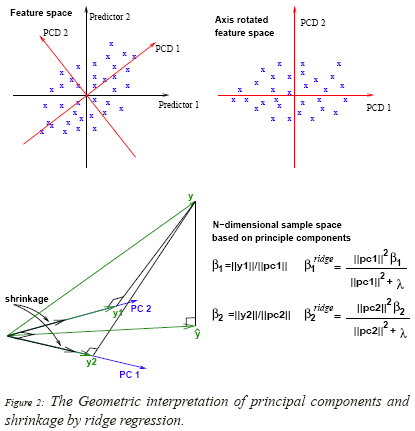

In [132]:
Image(filename='/Users/datascientist/Desktop/DSCI6003/week3/3.1/images/shrinkage.png', width=500, height=1000)

In theory, OLS regression takes a projection of the data, $y$, onto the the principal components of the data, $PC_i$ (green vectors), in the above figure. The principal equation for OLS regression, as you well know by now, is:

$$\hat{\textbf{$\beta$}} = (X^TX)^{-1}Xy$$


This is why we can do PCA regression, by definition. The values of $\beta_i$ are the vector coordinates of the principle components of the data. But recall that if noise is present in the data, it will appear as a change in direction of the $PC_i$ vectors. We can reduce the influence of any one vector on the prediction of $y$ if we reduce the *size* of all $PC_i$ vectors. This is what shrinkage does. By shrinking the size of these vectors proportional to a factor $\lambda$ (black arrows), we can eliminate some of the effect of noise on the future prediction. This also leads to a change in the direction and magnitude of the future prediction of $y$. This is exactly the same as adding in a factor to the principal components, for each axis, defined as:

$$\hat{\textbf{$\beta$}}_{Ridge} = (X^TX+\lambda I_p)^{-1}Xy$$


Hence we trade some variance in exchange for increased bias.  (Lasso regression eliminates short vectors entirely)

####The Bayesian Interpretation of Regularized Regression

We will not go into this excessively much, but it is worth mentioning that regularized regression has an intuitive connection to Bayes' law. Reaching back into the principles we already discussed earlier this year, let's discuss the $\beta$ coefficients. Recall that the $\beta$ coefficients in any random regression can be considered as being drawn from a Gaussian distribution. 

Suppose now, we are given a vector of $\beta$ coefficients $\textbf{$\beta$} = \begin{bmatrix} \beta_{1} & \beta_{2} & \dots & \beta_{n} \end{bmatrix} $ with distribution $p(\textbf{$\beta$})$ for each coefficient:

Given that we have a standard linear regression in vector form:

$$\textbf{Y} = \textbf{$\beta$}^{T}\textbf{X} + \epsilon$$

We can write the likelihood function of the data as:

$$ LLF = f(\textbf{Y}|\textbf{X}, \textbf{$\beta$})$$

Using Bayes law, we can now use the chain rule (taught last semester) and write the posterior distribution (assuming X is fixed):

$$p(\textbf{$\beta$}|\textbf{X},\textbf{Y}) = \frac{f(\textbf{Y}|\textbf{X}, \textbf{$\beta$})p(\textbf{$\beta$})}{p(\textbf{X},\textbf{Y})}$$

$$p(\textbf{$\beta$}|\textbf{X},\textbf{Y}) = \frac{f(\textbf{Y}|\textbf{X}, \textbf{$\beta$})p(\textbf{$\beta$}|\textbf{X})p(\textbf{X})}{p(\textbf{Y}|\textbf{X})p(\textbf{X})}$$

$$p(\textbf{$\beta$}|\textbf{X},\textbf{Y}) = \frac{f(\textbf{Y}|\textbf{X}, \textbf{$\beta$})p(\textbf{$\beta$}|\textbf{X})}{p(\textbf{Y}|\textbf{X})}$$

$$p(\textbf{$\beta$}|\textbf{X},\textbf{Y}) \propto f(\textbf{Y}|\textbf{X}, \textbf{$\beta$})p(\textbf{$\beta$}|\textbf{X})$$

What this says is that the probability of getting the values of $\beta$ we observe are dependent on the the likelihood function of the data multiplied by the probability of getting the $\beta$ values dependent on X. This matters when we talk about the probability distribution $p(\textbf{$\beta$})$. Assuming that we model the $\beta$ values as being independent:

$$p(\textbf{$\beta$}) = \prod\limits_{j=1}^n g(\beta_j)$$

It turns out in the case where $g(\beta_j)$ is a Gaussian, it turns out that the *most likely value (mean and posterior mode) for $\textbf{$\beta$}$* is the Ridge regression solution. 

In the case where $g(\beta_j)$ is a Laplacian distribution (double-exponential), it turns out that the *posterior mode of $\textbf{$\beta$}$* is the Lasso regression solution. However, the Lasso solution is not the mean.

##Additional Reading:

Hastie, Elements of Statistical Learning Ch. 3.1-3.4


##Exercise:

Answer the following questions on your own (without relying on the instructor to lead you through the solution). Justify your answer in any way possible. You may argue using mathematical reasoning, qualitative logic, or empirical results. Google is also your friend. You may *NOT* simply say that someone told you the answer. 

Use the following answer key:

    a) Increase initially then start decreasing in an inverted U shape
    b) Decrease initially then start increasing in a U shape
    c) Steadily increase
    d) Steadily decrease
    e) Remain constant


Examine the Lasso equations. Make the following predictions. The answers are not dependent on the nature of the input data, other than that you may assume the data has nonzero error terms present.

    A) As we increase lambda from 0, the training RSS will:
    B) As we increase lambda from 0, the test RSS will:
    C) As we increase lambda from 0, the variance will:
    D) As we increase lambda from 0, the bias will: